# Classification of input methods via SVM
Can we use SVM to identify and predict which input method was used on any given round of the test based on the other data present in the dataset. 

the SVM documentation can be found [here](https://scikit-learn.org/stable/modules/svm.html)

In [1]:
#Import most of the packages we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import  train_test_split 

In [2]:
#Load in the data and remove the outliers we found in the previous step of data exploration
df = pd.read_excel('reaction_time_cleaned.xlsx')
df = df[np.abs(df.time - df.time.mean()) <= (3*df.time.std())]
df.shape

(299, 9)

In [3]:
# Make an array X of holding the training samples,
#and an array y of class labels of shape (n_samples):
x = df.drop(columns = ['method', 'user_id'])
y = df['method']

In [4]:
# Split the data into a training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [5]:
X_train.shape, X_test.shape

((209, 7), (90, 7))

In [6]:
y_train.shape, y_test.shape

((209,), (90,))

In [7]:
import category_encoders as ce
# import category encoders 

In [8]:
# encode remaining variables with one-hot encoding 
 
encoder = ce.OneHotEncoder() 
 
X_train = encoder.fit_transform(X_train) 
X_test = encoder.transform(X_test) 
X_train.shape

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


(209, 20)

In [9]:
X_train.head()

,sex_1,sex_2,gender_1,gender_2,ethnicity_1,ethnicity_2,ethnicity_3,ethnicity_4,age_1,age_2,age_3,age_4,age_5,tech_level,round_1,round_2,round_3,round_4,round_5,time
287,1,0,1,0,1,0,0,0,1,0,0,0,0,5,1,0,0,0,0,0.257000
46,0,1,0,1,0,1,0,0,1,0,0,0,0,10,0,1,0,0,0,0.295999
246,0,1,0,1,0,0,1,0,0,1,0,0,0,10,1,0,0,0,0,0.298999
194,1,0,1,0,0,0,0,1,0,0,1,0,0,10,0,0,1,0,0,0.328999
157,0,1,0,1,1,0,0,0,0,1,0,0,0,8,0,0,0,1,0,0.324900


In [10]:
#Save the column names we will need them after applying the scaler
cols = X_train.columns
print(cols)

Index(['sex_1', 'sex_2', 'gender_1', 'gender_2', 'ethnicity_1', 'ethnicity_2',
       'ethnicity_3', 'ethnicity_4', 'age_1', 'age_2', 'age_3', 'age_4',
       'age_5', 'tech_level', 'round_1', 'round_2', 'round_3', 'round_4',
       'round_5', 'time'],
      dtype='object')


In [11]:
# This is for later testing
#pd.DataFrame(scaler.fit_transform(X_train.tech_level.values.reshape(-1,1)), columns=['tech_level'])

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
#X_test['tech_level'] = pd.DataFrame(scaler.transform(X_test.tech_level.values.reshape(-1,1)), columns=['tech_level'])
#X_test['time'] = pd.DataFrame(scaler.transform(X_test.time.values.reshape(-1,1)), columns=['time'])


In [13]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [14]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [15]:
y_pred = classifier.predict(X_test)
y_pred

array(['Touchscreen', 'Spacebar', 'Spacebar', 'Touchscreen',
       'Touchscreen', 'Touchscreen', 'Spacebar', 'Touchscreen',
       'Spacebar', 'Touchscreen', 'Mouse', 'Touchscreen', 'Spacebar',
       'Spacebar', 'Spacebar', 'Spacebar', 'Mouse', 'Touchscreen',
       'Touchscreen', 'Mouse', 'Spacebar', 'Spacebar', 'Mouse',
       'Spacebar', 'Touchscreen', 'Touchscreen', 'Touchscreen',
       'Spacebar', 'Spacebar', 'Spacebar', 'Touchscreen', 'Spacebar',
       'Spacebar', 'Touchscreen', 'Touchscreen', 'Touchscreen',
       'Touchscreen', 'Mouse', 'Mouse', 'Spacebar', 'Spacebar',
       'Spacebar', 'Touchscreen', 'Mouse', 'Spacebar', 'Touchscreen',
       'Touchscreen', 'Spacebar', 'Spacebar', 'Spacebar', 'Touchscreen',
       'Spacebar', 'Touchscreen', 'Touchscreen', 'Touchscreen',
       'Touchscreen', 'Touchscreen', 'Spacebar', 'Spacebar',
       'Touchscreen', 'Spacebar', 'Touchscreen', 'Mouse', 'Mouse',
       'Spacebar', 'Touchscreen', 'Mouse', 'Touchscreen', 'Spacebar',
       

In [16]:
print('Accuracy score: ', format(accuracy_score(y_test, y_pred)))

Accuracy score:  0.24444444444444444


In [17]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [18]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['Mouse','Spacebar','Touchscreen'], 
                     columns = ['Mouse','Spacebar','Touchscreen'])

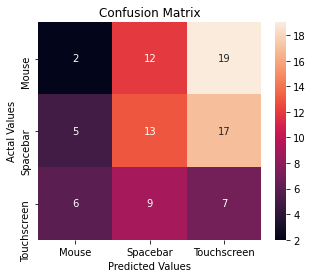

In [19]:
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [20]:
print('\n Mouse True Positives(TP) = ', cm[0,0])
print('\n Mouse False Negatives(FN) = ', cm[0,1] + cm[0,2])
print('\n Mouse False Positives(FP) = ', cm[1,0] + cm[2,0])
print('\n Mouse True Negatives(TN) = ', cm[1,1] + cm[1,2] + cm[2,1] + cm[2,2] )


 Mouse True Positives(TP) =  2

 Mouse False Negatives(FN) =  31

 Mouse False Positives(FP) =  11

 Mouse True Negatives(TN) =  46


In [21]:
print('\n Spacebar True Positives(TP) = ', cm[1,1])
print('\n Spacebar False Negatives(FN) = ', cm[1,0] + cm[1,2])
print('\n Spacebar False Positives(FP) = ', cm[0,1] + cm[2,1])
print('\n Spacebar True Negatives(TN) = ', cm[0,0] + cm[0,2] + cm[2,0] + cm[2,2] )


 Spacebar True Positives(TP) =  13

 Spacebar False Negatives(FN) =  22

 Spacebar False Positives(FP) =  21

 Spacebar True Negatives(TN) =  34


In [22]:
print('\n Touchscreen True Positives(TP) = ', cm[2,2])
print('\n Touchscreen False Negatives(FN) = ', cm[2,0] + cm[2,1])
print('\n Touchscreen False Positives(FP) = ', cm[0,2] + cm[1,2])
print('\n Touchscreen True Negatives(TN) = ', cm[0,0] + cm[0,1] + cm[1,1] + cm[1,0] )


 Touchscreen True Positives(TP) =  7

 Touchscreen False Negatives(FN) =  15

 Touchscreen False Positives(FP) =  36

 Touchscreen True Negatives(TN) =  32


In [23]:
print("The classification report is as follows...\n")
print(classification_report(y_test, y_pred))

The classification report is as follows...

              precision    recall  f1-score   support

       Mouse       0.15      0.06      0.09        33
    Spacebar       0.38      0.37      0.38        35
 Touchscreen       0.16      0.32      0.22        22

    accuracy                           0.24        90
   macro avg       0.23      0.25      0.23        90
weighted avg       0.24      0.24      0.23        90



#### Precision

“When it predicts the positive result, how often is it correct?”
This is obtained by using the following formulae:

Precision = TP / (TP + FP)

Precision is usually used when the goal is to limit the number of false positives (FP). For example, this would be the metric to focus on if our goal with the spam filtering algorithm is to minimize the number of reals emails that are classified as spam.

#### Recall

“When it is actually the positive result, how often does it predict correctly?”
This is obtained by using the following formulae:

Recall = TP / (TP + FN)

Recall is usually used when the goal is to limit the number of false negatives (FN). In our example, that would correspond to minimizing the number of spam emails that are classified as real emails. Recall is also known as “sensitivity” and “true positive rate” (TPR).

#### f1-score

This is the harmonic mean of precision and recall:

f1-score = 2 * precision*recall / (precision + recall)

It is useful when you need to take both precision and recall into account. If you try to only optimize recall, your algorithm will predict most examples to belong to the positive class, but that will result in many false positives and, hence, low precision. On the other hand, if you try to optimize precision, your model will predict very few examples as positive results (the ones which highest probability), but recall will be very low.